## <font color='blue'>**Business Objective:**</font>

Customer engagement serves as a proxy for customer management, a crucial component of the restaurant business. When there is competition in the market and the business wants to enhance the service with respect to taste and quality of food served, keeping customers becomes very important. Getting reviews and feedback from customers is the first step in customer engagement. Feedback serves as a teaching tool and gives clients a sense of importance and value.

The objective of our classification system is to categorize the restaurant food reviews for Sophie’s @ The Dean Galway into three - positive, negative or neutral. Sophie's wants to improve their business by gathering customer reviews online with respect to food as they are receiving mixed reviews. Being in a world where social media impression is strong, the opinions and feedback of customers are a strong basis for any strategy development, and analysis of strengths and weaknesses. Hence, we are training machine learning models  and also testing the best model which predicts whether a review is positive, negative or neutral. Negative and neutral food reviews will give insights to the management as to what area can they improve on especially in the menu development and food service. This can mitigate impact to reputation and as well as, improve customer satisfaction. On the other hand, management can capitalize on positive reviews by incorporating it in the marketing efforts. Hence, by classifying food reviews, management will be able to have a clear picture on whether they stand strong or weak in terms of food service, especially being in a restaurant industry.


<a id="4"></a>
# <p style="padding:10px;background-color:#001f3f;margin:0;color:#e9c46a;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Importing the Libraries</p>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
import string
import pickle
import re
import nltk
from nltk.corpus import stopwords
from collections import Counter
from sklearn.pipeline import Pipeline
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.model_selection import cross_val_score, train_test_split, StratifiedKFold,GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, adjusted_rand_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix, f1_score, ConfusionMatrixDisplay
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import precision_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SpatialDropout1D, LSTM, Dense
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from xgboost import XGBClassifier
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping

# Download NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

import warnings
warnings.filterwarnings("ignore")
import os


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
# load the dataset
data=pd.read_csv("fetched_resturant_file.csv")

In [3]:
# Sample rows of dataset
data.head(7)

,Reviews,Sentiment
0,"Very accomodating of our party, including our ...",2
1,Very good service and good food. Restaurant wa...,2
2,"We booked a table for dinner, to celebrate a f...",1
3,We had an amazing two night stay. From recepti...,2
4,Such a fun place for dinner and drinks on St P...,2
5,I have to say I was disappointed with the menu...,0
6,The environment was spacious and exquisite!!! ...,2


In [4]:
#shape of dataset
print(f"Shape Of The Dataset : {data.shape}")

Shape Of The Dataset : (600, 2)


In [5]:
#Information about dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Reviews    600 non-null    object
 1   Sentiment  600 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 9.5+ KB


In [6]:
#columns with missing values
data.isnull().sum()

Reviews      0
Sentiment    0
dtype: int64

In [7]:
#checking for Duplicate rows
duplicated_rows = data.duplicated().sum()

if duplicated_rows == 0:
    print('There is no Duplicate rows --> No action needed')
else:
    print(f'There are duplicate rows: {duplicated_rows}')
    df = data.drop_duplicates()
    print(f'After removing duplicated rows: {data.shape[0]}')

There is no Duplicate rows --> No action needed


<a id="4"></a>
# <p style="padding:10px;background-color:#001f3f;margin:0;color:#e9c46a;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Data Visualization</p>

In [8]:
#checking unique value of Sentiment
data['Sentiment'].unique()

array([2, 1, 0])

In [9]:
# Create a copy of the original DataFrame for visualization
data_vis = data.copy()

# Replace numeric sentiment values with corresponding labels in the copy
data_vis['Sentiment'] = data_vis['Sentiment'].replace({0:'Negative', 1:'Neutral', 2:'Positive'})

# Count the values of each sentiment type
sentiment_counts = data_vis['Sentiment'].value_counts()

# Define custom colors
colors = ['#FF5733', '#3498DB', '#58D68D']

# Create bar plot using Plotly
fig = go.Figure(data=[go.Bar(
    x=sentiment_counts.index,  # Sentiment types
    y=sentiment_counts.values,  # Counts of each sentiment type
    marker_color=colors  # Use custom colors
)])

# Update layout of the plot
fig.update_layout(
    title='Number of types of comments',
    xaxis=dict(title='Comment_type'),
    yaxis=dict(title='Number'),
    width=700,
    height=400
)

# Show the plot
fig.show()

# Print the message about replacing sentiment values
print("Here sentiment values means: {0:'Negative', 1:'Neutral', 2:'Positive'}")

Here sentiment values means: {0:'Negative', 1:'Neutral', 2:'Positive'}



#### <font color='red'>**Note: Dataset is imbalanced, hence we have performed over sampling : SMOTE in the further analysis**</font>

**Code Explanation:**

The code utilizes Plotly for visualizing sentiment distribution in review data. It begins by replacing numeric sentiment values with text labels for clarity. Then, it generates a bar plot showing sentiment frequencies, with custom colors for distinction. The plot is interactive and includes informative titles and labels.

**Result:**

Upon execution, the code produces an interactive bar chart displaying sentiment distribution. Users can explore trends easily, gaining insights into feedback patterns for `Sophie’s @ The Dean Galway.`

### Word Cloud:

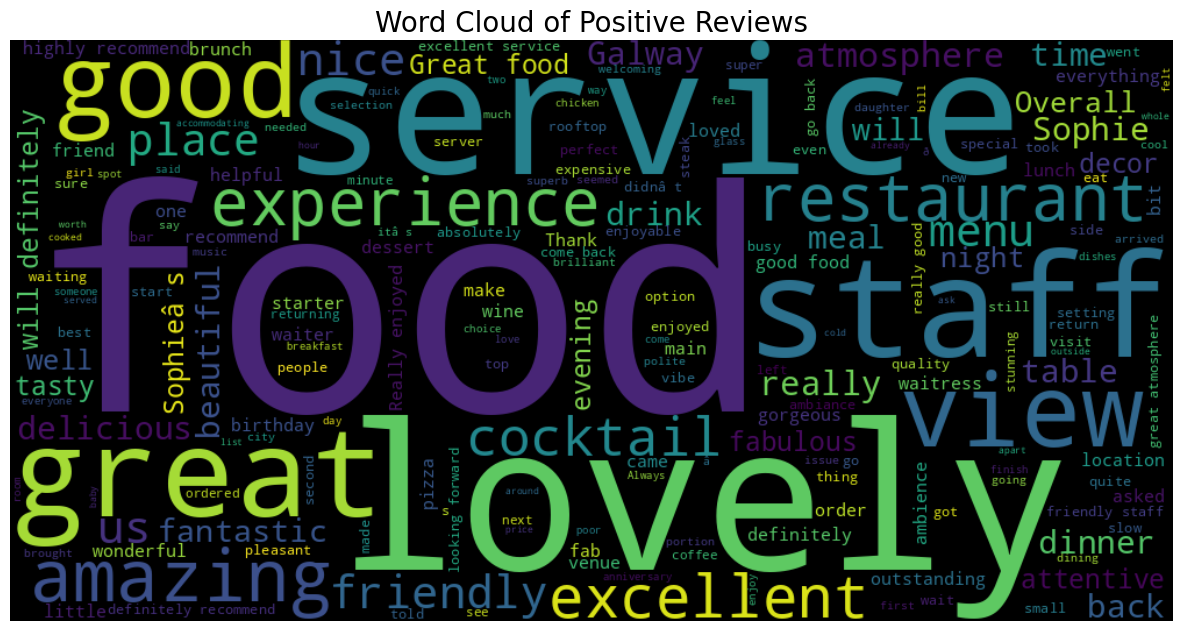

In [10]:
# Word cloud of the reviews with rating equal to 2 i.e Positive

# Filter reviews with rating equal to 2
df_rate_two = data.loc[data['Sentiment'] == 2, 'Reviews']

# Join the filtered reviews into a single string
k1 = ' '.join(df_rate_two)

# Generate word cloud
wordcloud_2 = WordCloud(width=1000, height=500).generate(k1)

# Plot the word cloud
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud_2, interpolation="bilinear")
plt.title('Word Cloud of Positive Reviews', fontsize=20)  # Add the title
plt.axis('off')
plt.show()

**Code Explanation:**

In the code below, we intended to create a word cloud from reviews that have been classified as positive (where Sentiment equals 2) within the data DataFrame. First, it filters out the reviews with a positive sentiment rating using the data.loc method. It then aggregates all the selected reviews into a single string with the join method. Following the aggregation, the WordCloud library is utilized to generate a visual word cloud, where the size of each word in the cloud corresponds to its frequency within the text. Parameters such as width and height are set to define the size of the word cloud image. In the subsequent lines, the code sets up the plot's size with plt.figure and displays the word cloud image with plt.imshow, with interpolation="bilinear" to smooth the displayed image. Finally, the code adds a title 'Word Cloud of Positive Reviews' and removes the axis with plt.axis('off') before presenting the plot using plt.show().

**Results:**

The resulting word cloud visually represents the most frequently occurring words in the positive reviews. Words like food, restaurant, service, love, excellent, and great appear prominently, indicating they are common in the dataset's positive reviews. The word love is particularly dominant, suggesting it is a recurring term in customer feedback. The size and prominence of words such as atmosphere, friendly, good, and Sophie imply that these aspects were frequently mentioned positively as well. This visualization not only succinctly conveys the positive aspects of the customers' experiences but also highlights the elements most appreciated, such as the food quality, service, and atmosphere of the venue. It provides a quick, intuitive sense of the overall sentiment and specific positive points that customers tend to focus on in their reviews. In the marketing perspective, Sophie Galway can use these positive reviews to highlight the strength of the restaurant . However, the result is also indirectly communicating that the expected positive reviews for food appeared less frequently than others such as "delicious"or "tasty". From the managerial perspective, Sophie @ the Dean Galway must take this cue to improve on these aspects.

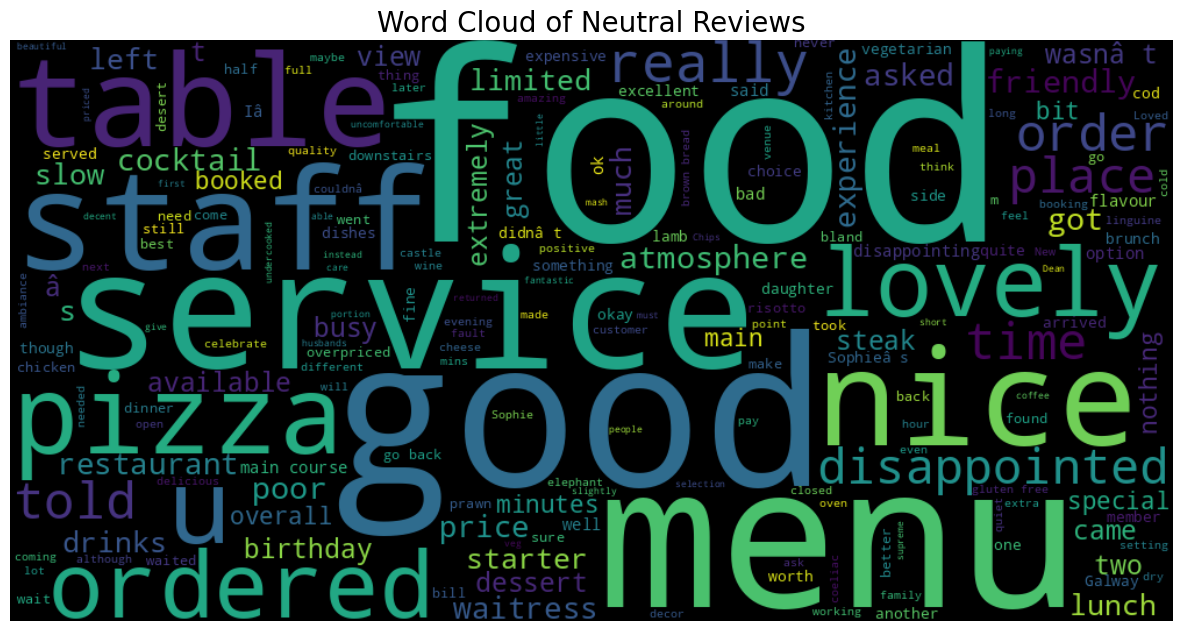

In [11]:
# Word cloud of the reviews with rating equal to 1 i.e Neutral

# Filter reviews with rating equal to 1
df_rate_one = data.loc[data['Sentiment'] == 1, 'Reviews']

# Join the filtered reviews into a single string
k1 = ' '.join(df_rate_one)

# Generate word cloud
wordcloud_1 = WordCloud(width=1000, height=500).generate(k1)

# Plot the word cloud
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud_1, interpolation="bilinear")
plt.title('Word Cloud of Neutral Reviews', fontsize=20)  # Add the title
plt.axis('off')
plt.show()

**Code Explanation:**

The code provided is designed to construct a word cloud from reviews labeled as neutral sentiment (with 'Sentiment' equal to 1) in the DataFrame data. Initially, it filters these specific reviews by applying a conditional selection to the DataFrame with data.loc. The text of the filtered reviews is then concatenated into a single string using ' '.join(df_rate_one). The WordCloud object is instantiated with specified dimensions, and the concatenated text is passed into the generate() method of the WordCloud object, which processes the text to determine the frequency of each word. A larger font size in the word cloud indicates a higher frequency of the word in the source text. The word cloud is then displayed using Matplotlib's plotting functions, with a figure size of 15x10 inches. The imshow() function renders the word cloud, and the plot is configured with no axis for a cleaner visual presentation. A title is added to the plot, and finally, plt.show() is called to display the resulting figure.

**Results:**

The produced word cloud is a graphical representation of the most frequently occurring words in the neutral reviews for this dataset. Words that stand out, such as `good,` `ordered,` `table,` `experience,` and `time,` are likely used frequently in the neutral reviews, but not with the same positive or negative intensity as in other sentiments. Some prominent words like `slow,` `poor,` and `disappointed` might be associated with negative experiences, but their context within the neutral reviews could be mitigated by other neutral or mildly positive language. Conversely, words like `lovely,` `great,` and `friendly` might be offset by critiques or less enthusiastic language, leading to their neutral classification. The visualization provides a nuanced view of the customer feedback, highlighting areas for potential improvement without strongly negative or positive leanings, offering a more moderate perspective.

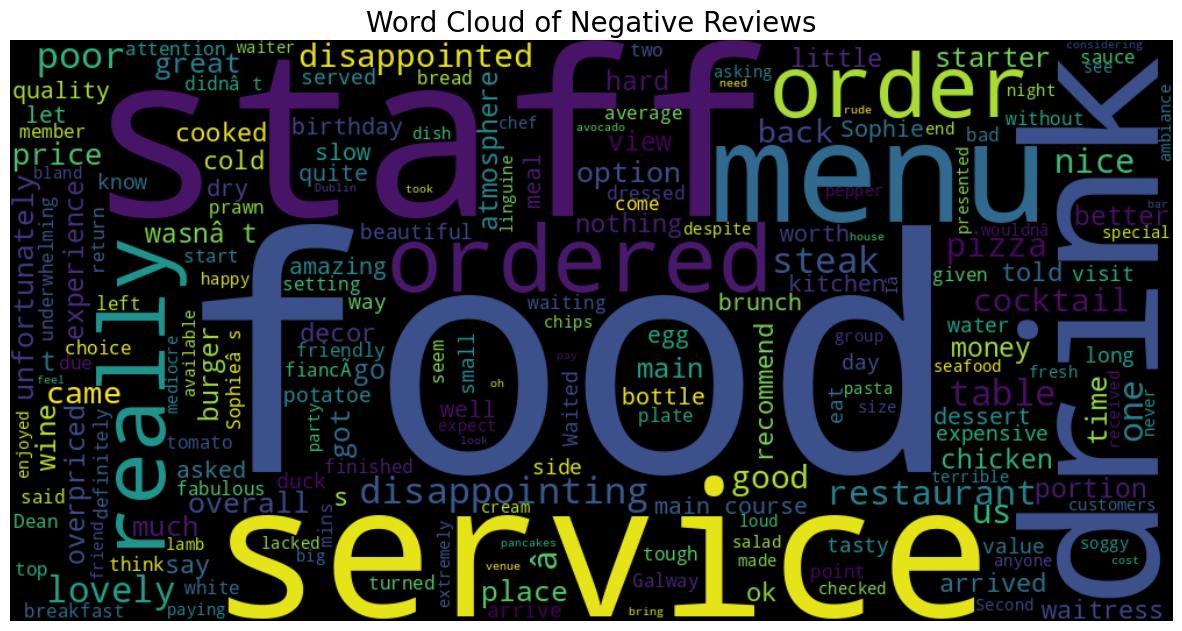

In [12]:
# Word cloud of the reviews with rating equal to 0 i.e Negative

# Filter reviews with rating equal to 0
df_rate_zero = data.loc[data['Sentiment'] == 0, 'Reviews']

# Join the filtered reviews into a single string
k1 = ' '.join(df_rate_zero)

# Generate word cloud
wordcloud_0 = WordCloud(width=1000, height=500).generate(k1)

# Plot the word cloud
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud_0, interpolation="bilinear")
plt.title('Word Cloud of Negative Reviews', fontsize=20)  # Add the title
plt.axis('off')
plt.show()


**Code Explanation:**

The code snippet is designed to create a word cloud from the reviews that have a rating of 0, which, in this context, presumably corresponds to negative sentiments. The data DataFrame is filtered to extract reviews from the Reviews column where the Sentiment column equals 0. This subset of reviews is then combined into a single string by joining each review separated by a space. A word cloud object is instantiated, specifying the dimensions of the resulting image, and the single string of text is fed into this object to generate the word cloud. Words that appear more frequently in the reviews will be displayed with a larger font size in the word cloud. The plotting of the word cloud is managed by matplotlib, setting the figure size and using imshow to display the word cloud with bilinear interpolation for smooth rendering. The axis is turned off to present a cleaner image, and a title 'Word Cloud of Negative Reviews' is set before the visualization is displayed with plt.show().

**Results:**

The result is a visualization that highlights the most prominent words in negative reviews. In the word cloud, the words disappointing, cold, slow, and expensive are quite large, indicating these terms come up frequently in negative feedback. Notably, food and service are prominent, suggesting these are common areas of concern. Despite the negative context, some positive words like lovely, good, and great also appear, which might be in reviews that had mixed sentiments or where a few positive comments were overshadowed by negative experiences. This word cloud can offer valuable insights into common issues customers faced, guiding improvements and addressing specific problems to enhance the overall customer experience.

In [13]:
# Feature Engineering
df_data_fe = data.copy()
df_data_fe['review_length'] = df_data_fe['Reviews'].str.len()
df_data_fe['freq_exclamation_marks'] = df_data_fe['Reviews'].str.count('\!')
df_data_fe['freq_question_marks'] = df_data_fe['Reviews'].str.count('\?')
df_data_fe['total_tags'] = df_data_fe['Reviews'].str.count('@')
df_data_fe['freq_punctuations'] = df_data_fe['Reviews'].str.count('[.,:;]')
df_data_fe['freq_question_marks'] = df_data_fe['Reviews'].str.count('[*&$%]')
df_data_fe['freq_words'] = df_data_fe['Reviews'].apply(lambda x: len(x.split()))
df_data_fe.head()

,Reviews,Sentiment,review_length,freq_exclamation_marks,freq_question_marks,total_tags,freq_punctuations,freq_words
0,"Very accomodating of our party, including our ...",2,150,0,0,0,7,25
1,Very good service and good food. Restaurant wa...,2,56,0,0,0,2,9
2,"We booked a table for dinner, to celebrate a f...",1,675,1,0,0,13,120
3,We had an amazing two night stay. From recepti...,2,514,0,1,0,8,99
4,Such a fun place for dinner and drinks on St P...,2,143,0,0,0,5,23


**Code Explanation:**

The code snippet  represents a feature engineering process applied to a DataFrame that contains text reviews. The process involves creating several new columns that quantify specific characteristics of each review text, which can be used later for machine learning or statistical analysis. The DataFrame df_data_fe is a copy of an original DataFrame data, and the new features include:

**review_length:** Counts the number of characters in each review.

**freq_exclamation_marks:** Counts the number of exclamation marks in each review.

**freq_question_marks:** Counts the number of question marks in each review.

**total_tags:** Counts occurrences of a pattern that could represent HTML or XML tags.

**freq_punctuations:** Counts occurrences of a pattern that could indicate punctuations.

**freq_words:** Counts the number of words in each review by splitting the text by spaces.
This code uses the str.count() method to count specific characters and patterns within the text, and len(x.split()) to count the number of words.

**Results:**

The output is a table displaying the first five entries of the modified DataFrame with the new features. Each row corresponds to a review with its sentiment score and the new metrics. For instance, the first review has 150 characters, no exclamation or question marks, 7 punctuations, and 25 words. These newly engineered features provide quantifiable insights into the dataset, such as the verbosity of a review, the intensity or emotion conveyed through punctuation, and the complexity indicated by the word count. This tabulated data can be instrumental in training models to understand patterns in sentiment or other text-derived conclusions, as these numerical features are readily usable for various statistical and machine learning techniques.

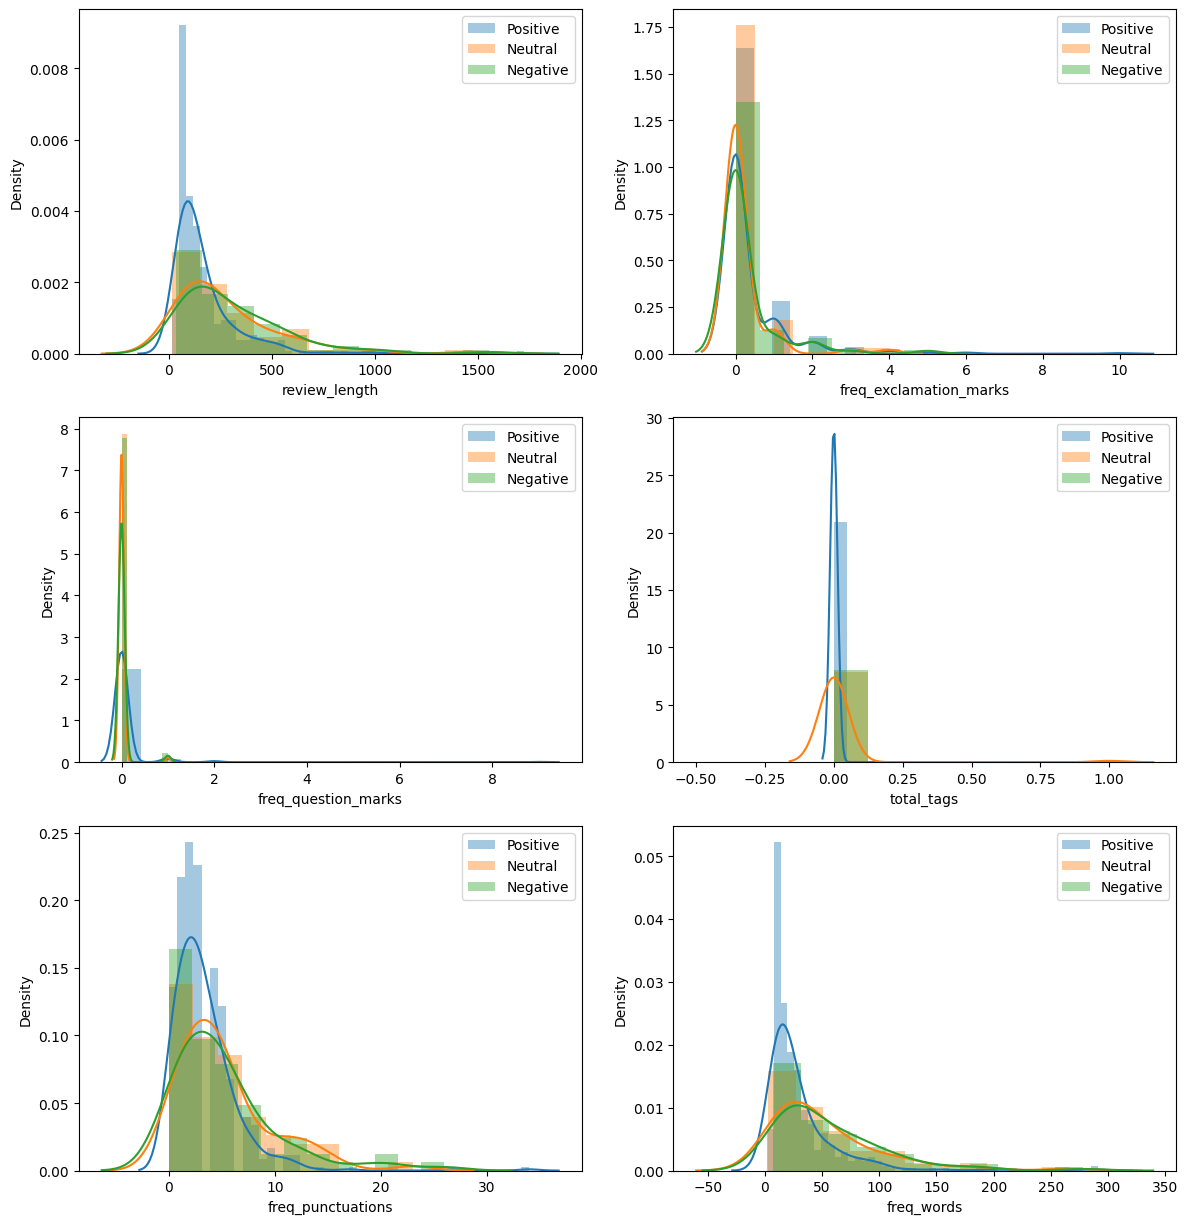

In [14]:
# Visualizing relationship of newly created features with the tweet sentiments
plt.figure(figsize=(12, 16))
features = ['review_length', 'freq_exclamation_marks', 'freq_question_marks',
            'total_tags', 'freq_punctuations', 'freq_words']
for i in range(len(features)):
    plt.subplot(4, 2, i+1)
    sns.distplot(df_data_fe[df_data_fe.Sentiment==2][features[i]], label = 'Positive')
    sns.distplot(df_data_fe[df_data_fe.Sentiment==1][features[i]], label = 'Neutral')
    sns.distplot(df_data_fe[df_data_fe.Sentiment==0][features[i]], label = 'Negative')
    plt.legend()
plt.tight_layout()
plt.show()

**Code Explanation**

The code above is utilizing Matplotlib and Seaborn to visualize the distribution of several newly engineered textual features in relation to sentiment classifications.
We have used the same to plot the distributions of features
1. review length
2. frequency of exclamation marks
3. frequency of question marks
4. total tags
5. frequency of punctuations
6. frequency of words

The above features are segmented by sentiment classes (positive, neutral, negative). Each subplot is created in a loop, where each feature is visualized using Seaborn's distplot which lets you show a histogram with a line on it. The DataFrame is filtered for each sentiment category, and a distribution plot for each of the selected feature is generated. This is done for all the above features mentioned, with each plot labeled accordingly and added to a grid of subplots with the plt.subplot function. The plt.tight_layout() method adjusts the spacing between the plots to prevent overlap, and plt.show() is used to display the collective figure.

**Visualization Explanations:**

**Review Length:**
This plot shows the distribution of the number of characters in reviews. It seems that most positive reviews tend to be concise, as indicated by the peak at the lower end of the x-axis. Negative and neutral reviews also show a similar pattern, but there are fewer of them compared to positive reviews. The long tail to the right in all three sentiments suggests that there are some lengthy reviews, but they are few comparitively.

**Frequency of Exclamation Marks:**
 We observed that exclamation marks are generally not common across all sentiments, with most reviews having none. However, when they do appear, they seem slightly more prevalent in positive reviews which clearly implies that customers use exclamation marks to express positive emotions or satisfaction.

**Frequency of Question Marks:**
This distribution is similar to that of the exclamation marks; most reviews do not contain question marks. There's a small peak in neutral reviews, possibly suggesting inquiries or confusion that is neither positive nor negative.

**Total Tags:**
This histogram indicates that HTML or XML tags within the review texts are rare or non-existent across all sentiments. This implies that reviews are generally plain text without much formatting, which is typical for customer feedback data.

**Frequency of Punctuations:**
This plot shows that punctuations are relatively common in reviews but are more frequently found in neutral and negative reviews. This could suggest that more complex sentence structures, which require punctuation, are used when giving detailed feedback that is not purely positive.

**Frequency of Words:**
Finally, this chart depicts the word count of reviews across the three sentiments. Positive reviews are concentrated at a lower word count, indicating brevity. Negative reviews show a slightly wider distribution, hinting that customers might give more elaborate feedback when their experience is unsatisfactory.

These visualizations together suggest that most reviews are brief and to the point, regardless of sentiment. Positive reviews, however, tend to be more concise and occasionally use exclamation marks, perhaps as a way to express delight. Negative and neutral reviews show more variability in length and punctuation, which may reflect more nuanced or mixed feedback

<a id="4"></a>
# <p style="padding:10px;background-color:#001f3f;margin:0;color:#e9c46a;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Data Cleaning</p>

In [15]:
# Removing any blank space
data['Reviews'] = data['Reviews'].str.strip()

In [16]:
# Define a function to clean the text
def clean_text(text):
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'(.)\1\1+', r"\1\1", text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.lower()
    tokens = word_tokenize(text)

    stop_words = set(stopwords.words('english'))
    tokens = [w for w in tokens if not w in stop_words]
    tokens = [w for w in tokens if len(w) > 2]

    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(w) for w in tokens]

    stemmer = PorterStemmer()  # Define stemmer here
    tokens = [stemmer.stem(w) for w in tokens]  # Use stemmer to stem tokens

    text = ' '.join(tokens)
    return text

# Apply new function
data['Reviews'] = data['Reviews'].apply(clean_text)


**Code Explanation**

The function clean_text is defined to preprocess text data for natural language processing tasks. Below are the following operations:

- `Remove Digits:` Eliminates numeric digits.
- `Remove Non-alphanumeric Characters:` Clears non-alphanumeric characters, keeping only letters and spaces.
- `Normalize Repeated Characters:` Reduces repeated characters to a maximum of two occurrences.
- `Remove Punctuation:` Filters out punctuation marks.
- `Convert to Lowercase:` Ensures uniformity by converting all text to lowercase.
- `Tokenization:` Splits text into individual words or tokens.
- `Remove Stopwords:` Filters out common words like 'the', 'is', etc.
- `Remove Short Words:` Eliminates tokens with a length less than or equal to 2.
- `Lemmatization:` Reduces words to their base or dictionary form.
- `Stemming:` Further reduces words to their root form.
The function is then applied to the 'Reviews' column of the DataFrame data to clean the text data.

**Result:**

Upon execution, the function preprocesses the text in the 'Reviews' column which makes it suitable to perform sentiment analysis.

In [17]:
#Checking cleaned dataframe
data.head(10)

,Reviews,Sentiment
0,accomod parti includ month old babi friendli s...,2
1,good servic good food restaur hop,2
2,book tabl dinner celebr friendâ birthday place...,1
3,amaz two night stay receptionist bedroom sophi...,2
4,fun place dinner drink patrickâ day food absol...,2
5,say disappoint menu sever time brought age par...,0
6,environ spaciou exquisit charm food grand alth...,2
7,view amaz side depend sit piti terrac doesnât ...,0
8,drink food servic good didnt like tabl top mak...,2
9,two friend love saturday brunch sophieâ food d...,2


## 20 most common words:

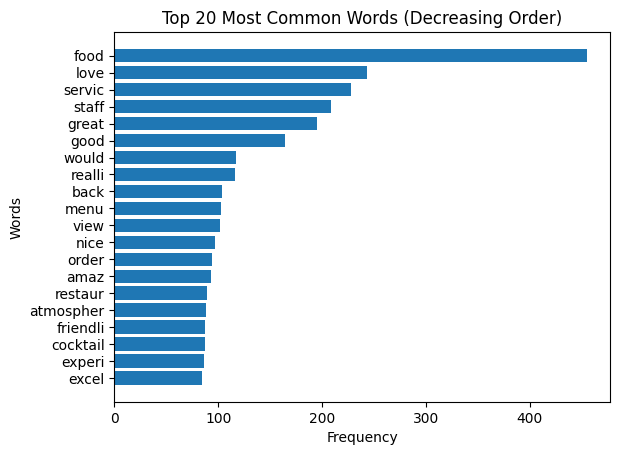

In [18]:
all_words = ' '.join(data['Reviews']).lower().split()
word_counts = Counter(all_words)
top_words = word_counts.most_common(20)[::-1]  # Reverse the order

# Visualize most common words in decreasing order
fig, ax = plt.subplots()
ax.barh([word for (word, count) in top_words], [count for (word, count) in top_words])
ax.set_xlabel('Frequency')
ax.set_ylabel('Words')
ax.set_title('Top 20 Most Common Words (Decreasing Order)')
plt.show()


**Code Explanation:**

To ensure consistent processing, in the above code we have converted all the review texts to lowercase. This step prevents discrepancies due to capitalization variations (e.g., “Yummy” vs. “yummy”).
Tokenization involves breaking down the reviews into individual words (tokens).
The code uses the collections.Counter class to count the frequency of each word. This class efficiently tracks word occurrences.
After counting word frequencies, we have identified the most common words in the reviews.
The top 20 most frequent words are selected. These words play a significant role in the sentiment analysis.
The heart of the code lies in creating a bar chart using the matplotlib library.

**Result:**

By examining the chart, we gain insights into which terms dominate the reviews.
Interpreting the Chart:
Common words like food,” “love,” service,” and “staff” stands out which are likely to influence the overall sentiment.
High-frequency words can indicate positive or negative sentiments. For instance, frequent use of “delicious” suggests positive experiences, while “poor” or “slow” may imply negative sentiments.



##  Extracting Top 4-grams in Positive Reviews:

In [19]:
# Filter reviews with rating equal to 2 (positive reviews)
positive_reviews = data[data['Sentiment'] == 2]['Reviews']

# Initialize CountVectorizer for 4-gram
vectorizer = CountVectorizer(ngram_range=(4, 4))

# Fit and transform the positive reviews data
ngrams = vectorizer.fit_transform(positive_reviews)

# Calculate the sum of frequencies for each n-gram
ngram_frequencies = ngrams.sum(axis=0)

# Get the feature names (4-grams)
feature_names = vectorizer.get_feature_names_out()

# Create a dictionary to store n-gram frequencies
ngram_freq_dict = {}
for feature, freq in zip(feature_names, ngram_frequencies.tolist()[0]):
    ngram_freq_dict[feature] = freq

# Sort the dictionary by frequency in descending order
sorted_ngram_freq = sorted(ngram_freq_dict.items(), key=lambda x: x[1], reverse=True)

# Select the top n-grams and their frequencies
top_ngrams = [pair[0] for pair in sorted_ngram_freq[:10]]  # Adjust the number of top n-grams to display
top_ngram_freqs = [pair[1] for pair in sorted_ngram_freq[:10]]

# Define custom colors for the bars
custom_colors = ['skyblue', 'salmon', 'lightgreen', 'plum', 'lightcoral',
                 'lightblue', 'lightpink', 'lightgray', 'orange', 'yellowgreen']

# Create the bar trace
trace = go.Bar(
    x=top_ngram_freqs[::-1],  # Reverse the order for descending display
    y=top_ngrams[::-1],  # Reverse the order for descending display
    orientation='h',  # Horizontal bar chart
    marker=dict(color=custom_colors)  # Custom colors
)

# Create the layout
layout = go.Layout(
    title='Top 4-grams in Positive Reviews (Descending Order)',
    xaxis=dict(title='Frequency'),
    yaxis=dict(title='4-gram')
)

# Create the figure
fig = go.Figure(data=[trace], layout=layout)

# Show the figure
fig.show()


**Code Explanation:**

The above code analyses reviews that are positive within a dataset. It starts by filtering reviews with a positive sentiment before extracting 4-grams, or word sequences made up of four words, using the CountVectorizer method. The top 10 most frequent 4-grams are chosen after the frequencies of these 4-grams are determined, recorded, and arranged in descending order in a dictionary. For the following horizontal bar chart, which shows the chosen 4-grams with their corresponding frequencies, custom colours are defined.

**Result:**

The visualization helps us to pinpoint the most frequent 4-word phrases that appear in the positive reviews.
Referemce : https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

## Extracting Top 5-grams in Positive Reviews

In [20]:
# Filter reviews with rating equal to 2 (positive reviews)
positive_reviews = data[data['Sentiment'] == 2]['Reviews']

# Initialize CountVectorizer for 5-gram
vectorizer = CountVectorizer(ngram_range=(5, 5))

# Fit and transform the positive reviews data
ngrams = vectorizer.fit_transform(positive_reviews)

# Calculate the sum of frequencies for each n-gram
ngram_frequencies = ngrams.sum(axis=0)

# Get the feature names (5-grams)
feature_names = vectorizer.get_feature_names_out()

# Create a dictionary to store n-gram frequencies
ngram_freq_dict = {}
for feature, freq in zip(feature_names, ngram_frequencies.tolist()[0]):
    ngram_freq_dict[feature] = freq

# Sort the dictionary by frequency in descending order
sorted_ngram_freq = sorted(ngram_freq_dict.items(), key=lambda x: x[1], reverse=True)

# Select the top n-grams and their frequencies
top_ngrams = [pair[0] for pair in sorted_ngram_freq[:10]]  # Adjust the number of top n-grams to display
top_ngram_freqs = [pair[1] for pair in sorted_ngram_freq[:10]]

# Define custom colors for the bars
custom_colors = ['skyblue', 'salmon', 'lightgreen', 'plum', 'lightcoral',
                 'lightblue', 'lightpink', 'lightgray', 'orange', 'yellowgreen']

# Create the bar trace
trace = go.Bar(
    x=top_ngram_freqs[::-1],  # Reverse the order for descending display
    y=top_ngrams[::-1],  # Reverse the order for descending display
    orientation='h',  # Horizontal bar chart
    marker=dict(color=custom_colors)  # Custom colors
)

# Create the layout
layout = go.Layout(
    title='Top 5-grams in Positive Reviews (Descending Order)',
    xaxis=dict(title='Frequency'),
    yaxis=dict(title='5-gram')
)

# Create the figure
fig = go.Figure(data=[trace], layout=layout)

# Show the figure
fig.show()


**Note:**

Similar to the earlier analysis, this code now focuses on extracting and visualizing the top 10 5-grams, sequences of 5 consecutive words, from positive reviews which helps to identify recurring patterns and phrases within positive reviews, providing insights into common themes and sentiments expressed by customers.

<a id="4"></a>
# <p style="padding:10px;background-color:#001f3f;margin:0;color:#e9c46a;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Word Vectorization</p>

In [21]:
# Seperating input features and target variable
X = np.array(data.iloc[:,0].values)
y = np.array(data.Sentiment.values)

In [22]:
# Apply CountVectorizer on input feature
cv = CountVectorizer(max_features = 1000)
X = cv.fit_transform(X).toarray()

In [23]:
#Display the dimension of input features and target variable
print("X.shape = ",X.shape)
print("y.shape = ",y.shape)

X.shape =  (600, 1000)
y.shape =  (600,)


**Explanaton:**

In the above code, input features and the target variable from the dataset are defined.
The input features are extracted from the first column of the dataset, i.e Reviews while the target variable, is extracted from the 'Sentiment' column.
The CountVectorizer method is applied to the 'Reviews' to convert them into a numerical representation suitable for machine learning algorithms and is configured to consider a maximum of 1000 features, meaning it will only consider the top 1000 most frequent words in the input features.
After transforming the input features using CountVectorizer, they are converted to an array format for further processing.
Finally, the dimensions of the input features (600, 1000) and the target variable (600,) are printed confirming the successful transformation and compatibility with machine learning algorithms.

<a id="4"></a>
# <p style="padding:10px;background-color:#001f3f;margin:0;color:#e9c46a;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Train Test Split</p>

In [24]:
#Split dataframe into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 200)

**Explanaton:**

We have  assigned 30% of the data for testing while the remaining 70% will be used for training. Additionally, a random state value of 200 is provided to ensure reproducibility of the split.
This process enables the evaluation of the machine learning model's performance on unseen data by training it on a subset and then testing it on another subset of the original dataset.

## Over Sampling: SMOTE

In [25]:
# Apply SMOTE only to the training set
smote = SMOTE(random_state=90)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Calculate class distribution after applying SMOTE
class_counts = np.bincount(y_train_resampled)

# Define class labels
class_labels = ['Negative', 'Neutral', 'Positive']

# Create a bar plot
fig = go.Figure(data=[go.Bar(
    x=class_labels,
    y=class_counts,
    marker_color=['skyblue', 'lightgreen', 'salmon']
)])

# Customize layout
fig.update_layout(
    title='Number of Samples in Each Class after SMOTE',
    xaxis=dict(title='Class'),
    yaxis=dict(title='Number of Samples'),
    plot_bgcolor='rgba(0,0,0,0)',  # Transparent background
    bargap=0.2,  # Gap between bars
    font=dict(size=14),  # Font size
)

# Show the plot
fig.show()


**Code Explanation:**

This code snippet applies Synthetic Minority Over-sampling Technique (SMOTE) solely to the training set to tackle class imbalance. Initially, SMOTE is invoked with a specified random state (random_state=90) to resample the training data. Subsequently, the class distribution of the resampled training set is calculated using np.bincount(). The class labels ('Negative', 'Neutral', 'Positive') are predefined for visualization purposes. A bar plot is then generated using Plotly's go.Bar object, where the x-axis denotes class labels and the y-axis represents the number of samples in each class after SMOTE. Custom colors are assigned to differentiate each class. Further layout customization is performed, including the title, axis labels, background color, bar gap, and font size. Finally, the resulting plot illustrating the balanced class distribution post-SMOTE is displayed.

**Result:**

The visualization illustrates the balanced class distribution achieved after applying SMOTE to the training set, providing insights into the effectiveness of the resampling technique in addressing class imbalance.
The below code snippet shows the dimensions of the input and target variables afte oversampling was performed.

In [26]:
#Checking dimension after oversampling for input feature
X_train_resampled.shape

(957, 1000)

In [27]:
#Checking dimension after oversampling for target variable
y_train_resampled.shape

(957,)

<a id="4"></a>
# <p style="padding:10px;background-color:#001f3f;margin:0;color:#e9c46a;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Classification Models</p>

We are going to apply 5 machine learning model of classifier and one Neural Network model, as mentioned below:
1. Logistic Regression
2. Naive Bayes
3. Random Forest Classifier
4. Support Vector Classifier
5. Gradient Boosting Classifier
6. LSTM Neural Network

The code for almost all the above models performs hyperparameter tuning, trains the model, evaluates its performance, and visualizes the confusion matrix with respect to Logistic Regression.Below are the operations which we have performed on most of the models.

- Pipeline Initialization
- Hyperparameter Grid Definition
- Stratified K-Fold Cross-Validation
- Grid Search with Cross-Validation
- Best Parameters and Best Estimator
- Training the Best Estimator
- Predictions and Evaluation Metrics: Accuracy score, F1 score, Precision, Recall and Confusion Matrix.

### 1.Logistic Regression:

Logistic Regression is a popular classification algorithm used for binary and multiclass classification tasks and models the probability of an instance belonging to a particular class based on input features.

Best Parameters: {'clf__C': 1.0}


Accuracy of Logistic Regression: 78.33 %
Precision: 0.77
Recall: 0.78
F1 Score: 0.77


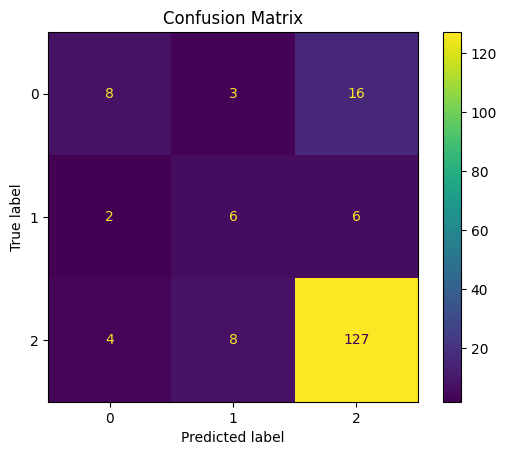

In [28]:
# Define the pipeline without SMOTE
pipeline = Pipeline([
    ('clf', LogisticRegression(max_iter=2000, solver='lbfgs'))
])

# Define hyperparameters to search
param_grid = {
    'clf__C': [0.01, 0.1, 1.0, 1.5, 2.0],
}

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=12, shuffle=True, random_state=100)

# Initialize GridSearchCV with StratifiedKFold
grid_search = GridSearchCV(pipeline, param_grid, cv=skf, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)

# Get the best estimator
best_estimator = grid_search.best_estimator_

# Fit the best estimator to the training data
best_estimator.fit(X_train, y_train)

# Predictions
y_pred = best_estimator.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print evaluation metrics
print("\n")
print("Accuracy of Logistic Regression:", round(accuracy * 100, 2), "%")
print("Precision:", round(precision, 2))
print("Recall:", round(recall, 2))
print("F1 Score:", round(f1, 2))

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=best_estimator.classes_)
disp.plot()
plt.title('Confusion Matrix')
plt.show()


**Result:** We can infer that the logistic regression model performs reasonably well with an accuracy of 78.33% and balanced precision, recall, and F1 score around 0.77.


In [29]:
# Define the file path to save the model
model_file_path = 'logistic_regression_model.pkl'

# Save the model using pickle
with open(model_file_path, 'wb') as file:
    pickle.dump(best_estimator, file)

print("Model saved successfully as:", model_file_path)

Model saved successfully as: logistic_regression_model.pkl


### 2.Naive Bayes:

Naive Bayes is a probabilistic classifier based on Bayes' theorem with the assumption of independence between features, often used for text classification tasks.

Best Parameters: {'clf__var_smoothing': 1e-09}


Accuracy of Gaussian Naive Bayes:  55.56 %
Precision:  0.64
Recall:  0.56
F1 Score:  0.59


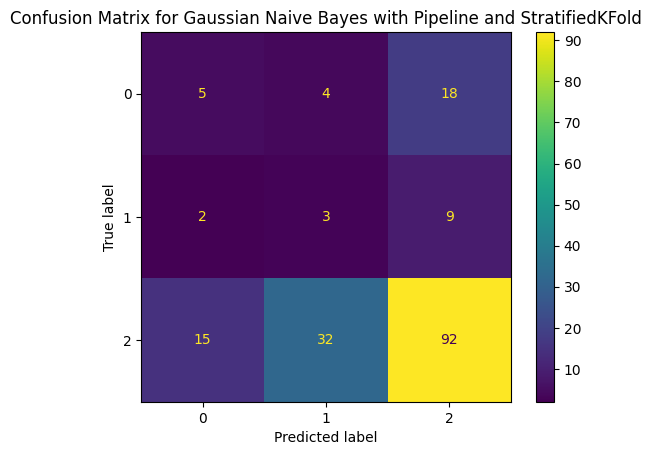

In [30]:
# Define StratifiedKFold with 12 splits
skf = StratifiedKFold(n_splits=12, shuffle=True, random_state=100)

# Define the pipeline
pipeline_gnb = Pipeline([
    ('clf', GaussianNB())
])

# Define hyperparameters to search
param_grid_gnb = {
    'clf__var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

# Initialize GridSearchCV with StratifiedKFold
grid_search_gnb = GridSearchCV(pipeline_gnb, param_grid_gnb, cv=skf, scoring='accuracy')

# Fit the grid search to the data
grid_search_gnb.fit(X_train, y_train)

# Print the best parameters found
print("Best Parameters:", grid_search_gnb.best_params_)

# Get the best estimator
best_estimator_gnb = grid_search_gnb.best_estimator_

# Fit the best estimator to the training data
best_estimator_gnb.fit(X_train, y_train)

# Predictions
y_pred_gnb = best_estimator_gnb.predict(X_test)

# Calculate evaluation metrics
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
precision_gnb = precision_score(y_test, y_pred_gnb, average='weighted')
recall_gnb = recall_score(y_test, y_pred_gnb, average='weighted')
f1_gnb = f1_score(y_test, y_pred_gnb, average='weighted')

# Print evaluation metrics
print("\n")
print("Accuracy of Gaussian Naive Bayes: ", round(accuracy_gnb * 100, 2), "%")
print("Precision: ", round(precision_gnb, 2))
print("Recall: ", round(recall_gnb, 2))
print("F1 Score: ", round(f1_gnb, 2))

# Calculate confusion matrix
conf_matrix_gnb = confusion_matrix(y_test, y_pred_gnb)

# Display confusion matrix
disp_gnb = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_gnb, display_labels=best_estimator_gnb.named_steps['clf'].classes_)
disp_gnb.plot()
plt.title('Confusion Matrix for Gaussian Naive Bayes with Pipeline and StratifiedKFold')
plt.show()


**Result:** This model achieved an accuracy of 55.56% with precision of 0.64, recall of 0.56, and an F1 score of 0.59, indicating moderate performance in classification tasks.

In [31]:
# Define the file path to save the model
gnb_model_file_path = 'gaussian_nb_model.pkl'

# Save the model using pickle
with open(gnb_model_file_path, 'wb') as file:
    pickle.dump(best_estimator_gnb, file)

print("Gaussian Naive Bayes model saved successfully as:", gnb_model_file_path)

Gaussian Naive Bayes model saved successfully as: gaussian_nb_model.pkl


### 3.Random Forest Classifier:

Random Forest Classifier is an ensemble learning method that constructs a multitude of decision trees during training and outputs the mode of the classes for classification tasks, known for its robustness and ability to handle complex datasets.

Best Parameters: {'rf__max_features': 'auto'}


Accuracy of Random Forest Classifier:  80.0 %
Precision:  0.73
Recall:  0.8
F1 Score:  0.8


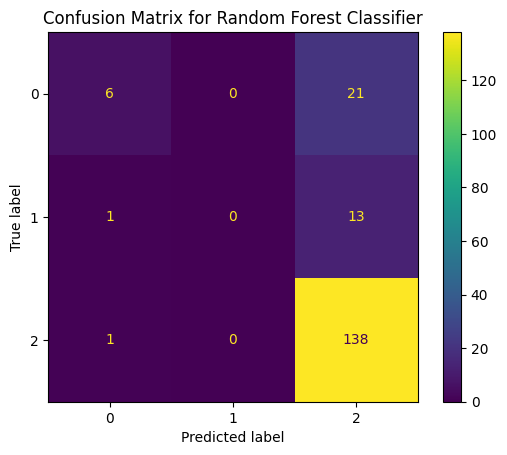

In [32]:
# Define the pipeline with Random Forest Classifier
pipeline_rf = Pipeline([
    ('rf', RandomForestClassifier(bootstrap=False, criterion='entropy',max_depth=30,
                                  min_samples_leaf=2, n_estimators=501))
])

# Define hyperparameters to search
param_grid_rf = {
    'rf__max_features': ['auto', 'sqrt']
}

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=12, shuffle=True, random_state=100)

# Initialize GridSearchCV with StratifiedKFold
grid_search_rf = GridSearchCV(pipeline_rf, param_grid_rf, cv=skf, scoring='accuracy')

# Fit the grid search to the data
grid_search_rf.fit(X_train, y_train)

# Print the best parameters found
print("Best Parameters:", grid_search_rf.best_params_)

# Get the best estimator
best_estimator_rf = grid_search_rf.best_estimator_

# Fit the best estimator to the training data
best_estimator_rf.fit(X_train, y_train)

# Predictions
y_pred_rf_pipeline = best_estimator_rf.predict(X_test)

# Calculate evaluation metrics
accuracy_rf_pipeline = accuracy_score(y_test, y_pred_rf_pipeline)
precision_rf_pipeline = precision_score(y_test, y_pred_rf_pipeline, average='weighted', zero_division=0.0)
recall_rf_pipeline = recall_score(y_test, y_pred_rf_pipeline, average='weighted')

# Print evaluation metrics
print("\n")
print("Accuracy of Random Forest Classifier: ", round(accuracy_rf_pipeline * 100, 2), "%")
print("Precision: ", round(precision_rf_pipeline, 2))
print("Recall: ", round(recall_rf_pipeline, 2))
print("F1 Score: ", round(recall_rf_pipeline, 2))

# Calculate confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf_pipeline)

# Display confusion matrix
disp_rf = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_rf, display_labels=best_estimator_rf.named_steps['rf'].classes_)
disp_rf.plot()
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

**Result:** This model achieved an accuracy of 80.0% with precision of 0.73, recall of 0.8, and an F1 score of 0.8, indicating strong performance in classification tasks.

In [33]:
# Define the file path to save the model
rf_model_file_path = 'random_forest_model.pkl'

# Save the model using pickle
with open(rf_model_file_path, 'wb') as file:
    pickle.dump(best_estimator_rf, file)

print("Random Forest Classifier model saved successfully as:", rf_model_file_path)


Random Forest Classifier model saved successfully as: random_forest_model.pkl


### 4.Support Vector Classifier:

Support Vector Classifier (SVC) is a supervised machine learning algorithm used for classification tasks, aiming to find the optimal hyperplane that best separates the classes in the feature space, maximizing the margin between classes, and often effective in high-dimensional spaces.


Best Parameters: {'clf__C': 0.01}


Accuracy of SVC:  77.22 %
Precision:  0.6
Recall:  0.77
F1 Score:  0.77


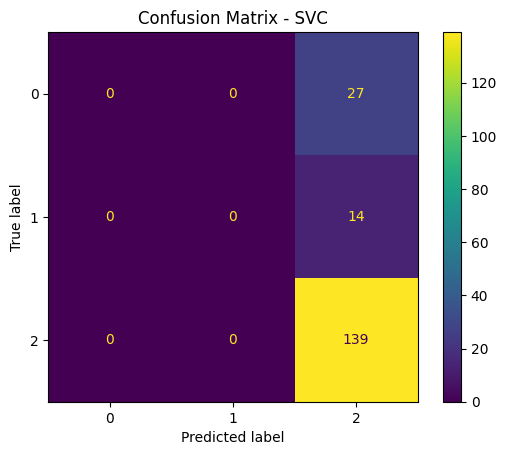

In [34]:
# Define the pipeline
pipeline_svck = Pipeline([
    ('clf', SVC(kernel='rbf', random_state=0, probability=True))
])

# Define hyperparameters to search
param_grid_svck = {
    'clf__C': [0.01, 0.1, 1.0],
}

# Initialize StratifiedKFold
skf_svck = StratifiedKFold(n_splits=12, shuffle=True, random_state=100)

# Initialize GridSearchCV with StratifiedKFold
grid_search_svck = GridSearchCV(pipeline_svck, param_grid_svck, cv=skf_svck, scoring='accuracy')

# Fit the grid search to the data
grid_search_svck.fit(X_train, y_train)

# Print the best parameters found
print("Best Parameters:", grid_search_svck.best_params_)

# Get the best estimator
best_estimator_svck = grid_search_svck.best_estimator_

# Fit the best estimator to the training data
best_estimator_svck.fit(X_train, y_train)

# Predictions
y_pred_svck_pipeline = best_estimator_svck.predict(X_test)

# Evaluation metrics
score1_svck = accuracy_score(y_test, y_pred_svck_pipeline)
score2_svck = precision_score(y_test, y_pred_svck_pipeline, average='weighted',zero_division=0.0)
score3_svck = recall_score(y_test, y_pred_svck_pipeline, average='weighted')

# Print evaluation metrics
print("\n")
print("Accuracy of SVC: ", round(score1_svck * 100, 2), "%")
print("Precision: ", round(score2_svck, 2))
print("Recall: ", round(score3_svck, 2))
print("F1 Score: ", round(score3_svck, 2))

# Confusion matrix
conf_matrix_svck_pipeline = confusion_matrix(y_test, y_pred_svck_pipeline)

# Display confusion matrix
disp_svck_pipeline = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_svck_pipeline, display_labels=best_estimator_svck.classes_)
disp_svck_pipeline.plot()
plt.title('Confusion Matrix - SVC')
plt.show()

**Result:** This models achieved accuracy of 77.22% with precision of 0.6, recall of 0.77, and an F1 score of 0.77, indicating a moderate level of performance in classification tasks.

In [35]:
# Define the file path to save the model
svc_model_file_path = 'rbf_svc_model.pkl'

# Save the model using pickle
with open(svc_model_file_path, 'wb') as file:
    pickle.dump(best_estimator_svck, file)

print("RBF SVC model saved successfully as:", svc_model_file_path)

RBF SVC model saved successfully as: rbf_svc_model.pkl


### 5. Gradient Boosting Classifier:

Gradient Boosting Classifier is a machine learning technique used for classification tasks, which builds a predictive model in a stage-wise fashion by combining multiple weak learners (usually decision trees) sequentially, with each new model correcting the errors of its predecessor, leading to a strong predictive model.

Best Parameters: {'clf__learning_rate': 0.2}


Accuracy of Gradient Boosting Classifier:  69.44 %
Precision:  0.72
Recall:  0.69
F1 Score:  0.7


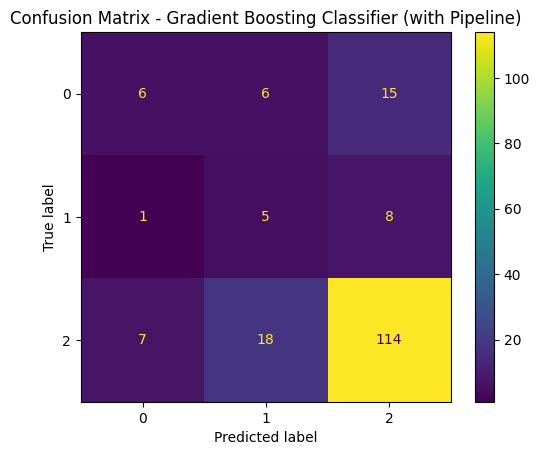

In [36]:
# Define the pipeline
pipeline_gb = Pipeline([
    ('clf', GradientBoostingClassifier(n_estimators=100, max_depth=5))
])

# Define hyperparameters to search
param_grid_gb = {
    'clf__learning_rate': [0.1, 0.2],
}

# Initialize GridSearchCV with StratifiedKFold
grid_search_gb = GridSearchCV(pipeline_gb, param_grid_gb, cv=skf, scoring='accuracy')

# Fit the grid search to the data
grid_search_gb.fit(X_train_resampled, y_train_resampled)

# Print the best parameters found
print("Best Parameters:", grid_search_gb.best_params_)

# Get the best estimator
best_estimator_gb = grid_search_gb.best_estimator_

# Fit the best estimator to the training data
best_estimator_gb.fit(X_train_resampled, y_train_resampled)

# Predictions
y_pred_gb_pipeline = best_estimator_gb.predict(X_test)

# Evaluation metrics
score1_gb = accuracy_score(y_test, y_pred_gb_pipeline)
score2_gb = precision_score(y_test, y_pred_gb_pipeline, average='weighted', zero_division=0.0)
score3_gb = recall_score(y_test, y_pred_gb_pipeline, average='weighted')
score4_gb = f1_score(y_test, y_pred_gb_pipeline, average='weighted')

#Print metrics:
print("\n")
print("Accuracy of Gradient Boosting Classifier: ", round(score1_gb * 100, 2), "%")
print("Precision: ", round(score2_gb, 2))
print("Recall: ", round(score3_gb, 2))
print("F1 Score: ", round(score4_gb, 2))

# Confusion matrix
conf_matrix_gb_pipeline = confusion_matrix(y_test, y_pred_gb_pipeline)

# Display confusion matrix
disp_gb_pipeline = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_gb_pipeline, display_labels=best_estimator_gb.classes_)
disp_gb_pipeline.plot()
plt.title('Confusion Matrix - Gradient Boosting Classifier (with Pipeline)')
plt.show()

**Result**: This model achieved a accuracy of 69.44% with precision of 0.72, recall of 0.69, and an F1 score of 0.7, indicating a moderate level of performance in classification tasks.

In [37]:
# Define the file path to save the model
gb_model_file_path = 'gradient_boosting_model.pkl'

# Save the model using pickle
with open(gb_model_file_path, 'wb') as file:
    pickle.dump(best_estimator_gb, file)

print("Gradient Boosting Classifier model saved successfully as:", gb_model_file_path)


Gradient Boosting Classifier model saved successfully as: gradient_boosting_model.pkl


### 6. LSTM Neuaral Network:

LSTM is a type of recurrent neural network (RNN) architecture, suitable for sequence prediction problems. It can remember information for long periods and is effective in handling sequence data.
The below code implements a sentiment analysis by preprocessing the text data using Tokenizer and LabelEncoder from Keras and sklearn libraries, respectively. The data is split into training and testing sets using train_test_split. The model architecture is defined using Sequential API from Keras, consisting of an Embedding layer, SpatialDropout1D layer, LSTM layer, and Dense layers. The model is compiled with categorical cross-entropy loss and Adam optimizer. EarlyStopping callback is employed to prevent overfitting during training. After training the model, predictions are made on the test data, and evaluation metrics including accuracy, precision, recall, and F1-score are calculated using sklearn metrics. Finally, the model's performance is summarized using classification_report. This approach encapsulates key steps in building and evaluating a sentiment analysis model using LSTM Neural Networks.


In [38]:
# Preprocessing
tokenizer = Tokenizer(num_words=500, split=' ')
tokenizer.fit_on_texts(data['Reviews'].values)
X = tokenizer.texts_to_sequences(data['Reviews'].values)
X = pad_sequences(X)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data['Sentiment'])
y = to_categorical(y)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Building
model = Sequential()
model.add(Embedding(500, 120, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(704, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(352, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

# Model Training with early stopping
history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1, validation_split=0.2, callbacks=[early_stopping])

# Predictions
y_pred_probabilities = model.predict(X_test)
y_pred = y_pred_probabilities.argmax(axis=1)

# Convert back to original labels
y_pred_original = label_encoder.inverse_transform(y_pred)
y_test_original = label_encoder.inverse_transform(y_test.argmax(axis=1))

# Model Testing
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy of LSTM NN model:", accuracy)

# Calculation of metrics
precision = precision_score(y_test_original, y_pred_original, average='weighted')
recall = recall_score(y_test_original, y_pred_original, average='weighted')
f1 = f1_score(y_test_original, y_pred_original, average='weighted')

# Print metrics:
print("\n")
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Classification Report
print(classification_report(y_test_original, y_pred_original))


Epoch 1/100
12/12 [==============================] - 8s 470ms/step - loss: 1.1327 - accuracy: 0.7396 - val_loss: 0.6946 - val_accuracy: 0.7917
Epoch 2/100
12/12 [==============================] - 5s 425ms/step - loss: 0.7036 - accuracy: 0.7526 - val_loss: 0.6319 - val_accuracy: 0.7917
Epoch 3/100
12/12 [==============================] - 5s 417ms/step - loss: 0.6338 - accuracy: 0.7656 - val_loss: 0.6004 - val_accuracy: 0.7812
Epoch 4/100
12/12 [==============================] - 5s 422ms/step - loss: 0.5447 - accuracy: 0.8021 - val_loss: 0.5750 - val_accuracy: 0.7812
Epoch 5/100
12/12 [==============================] - 5s 415ms/step - loss: 0.4837 - accuracy: 0.8073 - val_loss: 0.5472 - val_accuracy: 0.7917
Epoch 6/100
12/12 [==============================] - 5s 414ms/step - loss: 0.3634 - accuracy: 0.8438 - val_loss: 0.5648 - val_accuracy: 0.8229
Epoch 7/100
12/12 [==============================] - 5s 416ms/step - loss: 0.3095 - accuracy: 0.8594 - val_loss: 0.5089 - val_accuracy: 0.8021

**Results:** The test accuracy we got is approximately 80.83%. Additionally, the macro average precision, recall, and F1 score are 0.51, 0.46, and 0.46 respectively, while the weighted average precision, recall, and F1 score are 0.71, 0.81, and 0.75 respectively, based on the classification results for 120 samples.

In [39]:
# Define the file path to save the model
model_path = 'LSTM sentiment_model.pkl'

# Save the model to disk
with open(model_path, 'wb') as f:
    pickle.dump(model, f)

print("Model saved successfully!")

Model saved successfully!


#### <font color='red'>NOTE: Random forest and LSTM is showing best score, so we are testing Random forest model for predicting the our review sentiment:</font>


In [40]:
# Define the file path from which to load the model
rf_model_file_path = 'random_forest_model.pkl'

# Load the model using pickle
with open(rf_model_file_path, 'rb') as model_file:
    loaded_model = pickle.load(model_file)

# Example text to predict sentiment
new_text = "It was a great food, I loved it!"

# Assuming new_text is already cleaned and ready for prediction
new_text_vector = vectorizer.transform([new_text]).toarray()[:, :1000]

# Make predictions using the loaded model
predicted_sentiment = loaded_model.predict(new_text_vector)

# Print the predicted sentiment
print("Predicted Sentiment:", predicted_sentiment)


Predicted Sentiment: [2]


**Explaination code:**

In the above code, we are loading a pre-trained Random Forest model from a file utilizing the pickle library. Subsequently, we feed our own review, which is new to the model, to evaluate its output. The review text, "It was a great food, I loved it!", is then subjected to text vectorization to transform it into a feature vector. For this instance, it is assumed that only the first 1000 features are utilized.Once the model is loaded and the review is vectorized, the loaded model is utilized to predict the sentiment of the new text input.

**Result:**

Upon execution of this code, Predicted Sentiment we got is 'Positive'. This indicates that the model predicts the sentiment of the provided text as 'Positive' and our model is effeciently and accurately performing sentiment analysis and predicting the sentiments.


**Refrences:**

- SMOTE | Overcoming Class Imbalance Problem Using SMOTE. (2020, October 6). Analytics Vidhya. https://www.analyticsvidhya.com/blog/2020/10/overcoming-class-imbalance-using-smote-techniques/#:~:text=SMOTE%3A%20Synthetic%20Minority%20Oversampling%20Technique

- Team, K. (n.d.). Keras documentation: EarlyStopping. Keras.io. https://keras.io/api/callbacks/early_stopping/



<p style="text-align:center; color:#ff5733; font-size:24px; font-weight:bold; font-style:italic;">------Thank you------</p>
